# Classification on the Titanic Dataset, predicting whether a passenger will survive or not. 

*First we will import the required libraries and read our dataset.*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
df = pd.read_csv('titanic.csv') 

*Let's check the dataframe.*

In [76]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [78]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


*The dataframe consists of 1309 instances and 10 attributes:*
- *pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)*
- *survived: Survival (0 = No; 1 = Yes)*
- *name: Name of passenger*
- *sex: Sex of passenger*
- *age: Age of passenger*
- *sibsp: Number of Siblings/Spouses Aboard*
- *parch: Number of Parents/Children Aboard*
- *ticket: Ticket Number*
- *fare: Passenger fare (British pounds)*
- *cabin: Cabin*
- *embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)*

*First of all, we can clearly see that the dataset hasnt got any outliers but the attributes 'age' and especially 'cabin' have a lot of missing values that we have to deal with later.*

## Exploratory Data Analysis.

*Let's examine the target variable first.*

/home/michael/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

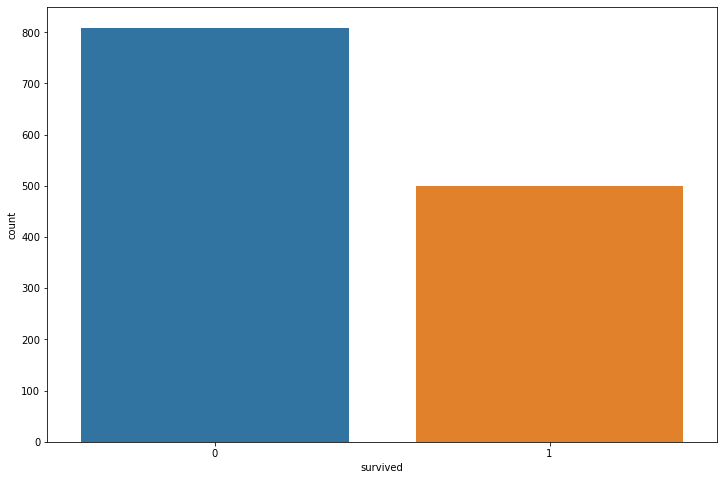

In [80]:
plt.figure(figsize=(12,8))
sns.countplot('survived', data = df)

*We can clearly see that the ones that didn't survive far outnumber the survivors, but the good news are that our target variable isn't imbalanced.*

*Now lets inspect our target variable in conjuction with 'sex'.*

/home/michael/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

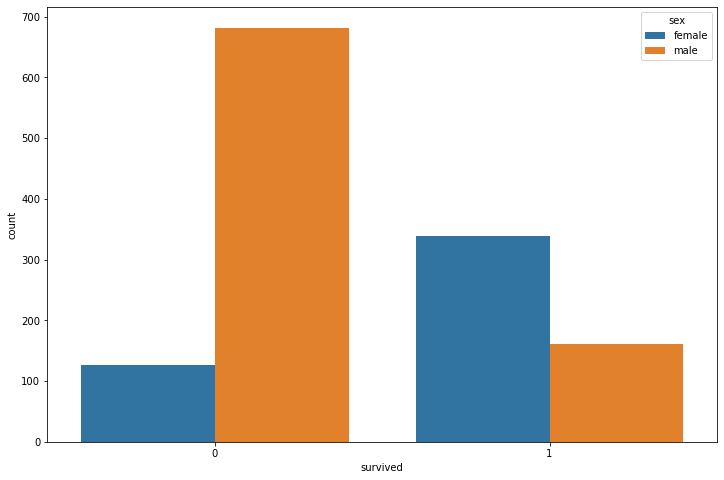

In [81]:
plt.figure(figsize=(12,8))
sns.countplot('survived',data = df, hue = 'sex')

*It is obvious that the survival ratio is in heavy favor of the women onboard, since the majority of men didn't survive.*

*What about the survival ratio in conjuction with passenger class.*

/home/michael/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

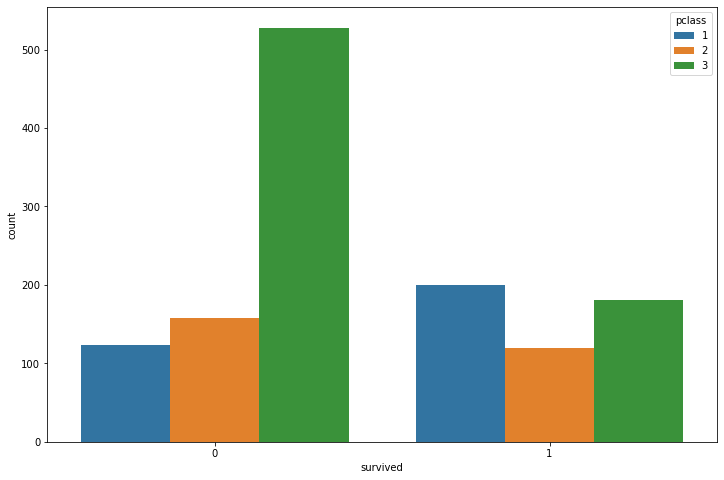

In [82]:
plt.figure(figsize=(12,8))
sns.countplot('survived',data = df, hue = 'pclass')

*Again it is obvious that the vast majority of survivors come from Passenger Class 1 and 2, while the passengers of class 3 didn't have many chances.*

*Now let's check for the 'embarked' attribute and see if there is any connection with survival.

/home/michael/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

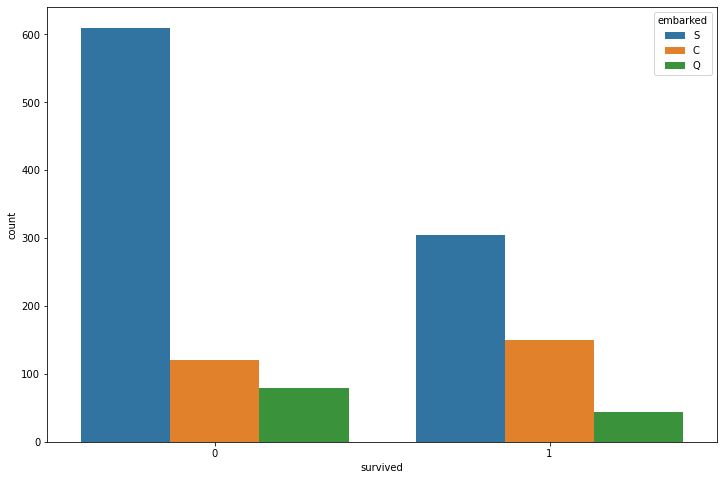

In [83]:
plt.figure(figsize=(12,8))
sns.countplot('survived',data = df, hue = 'embarked')

*There seems to be some connection, so this will be another useful feature.*

*Now we will do a countplot of the Passenger class in order to see the distribution of passengers.*

/home/michael/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

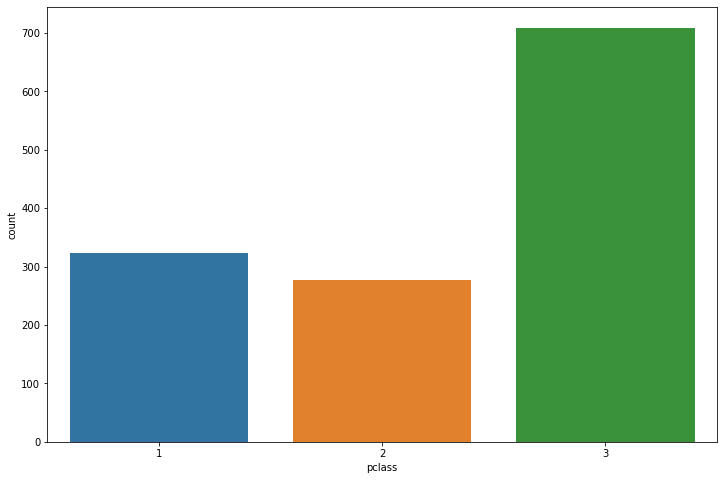

In [84]:
plt.figure(figsize=(12,8))
sns.countplot('pclass',data = df)

*The majority of the passengers belong to the 3rd class, with the smallest number of survivors.*

*Let's do a countplot of the 'sibsp' attribute in order to visualize better.*

/home/michael/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sibsp', ylabel='count'>

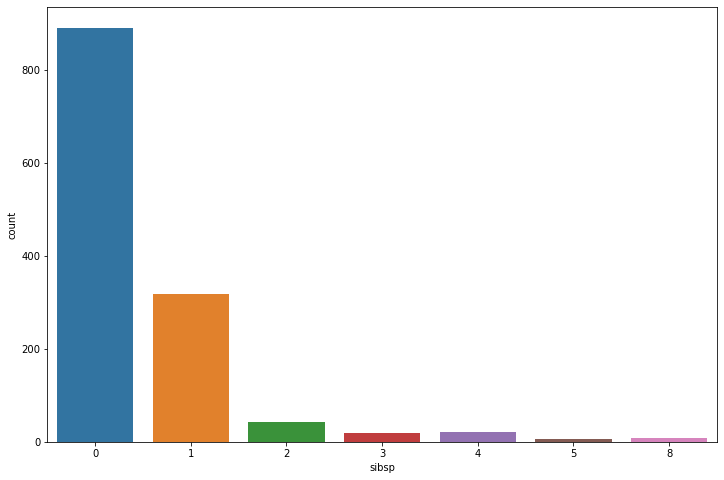

In [85]:
plt.figure(figsize=(12,8))
sns.countplot('sibsp',data = df)

*From the above graph, in conjuction with the previous ones we can conclude that the vast majority of passengers travelled alone and they were probably men belonging to the 3rdclass.*

*Let's see how the age distribution is.*

/home/michael/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

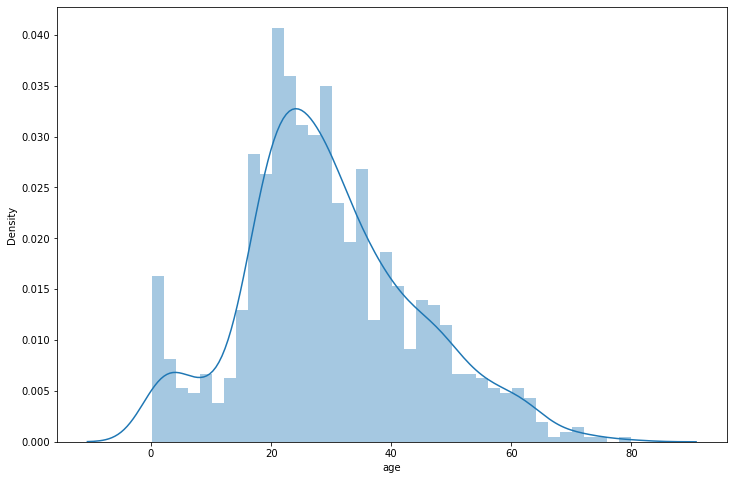

In [86]:
plt.figure(figsize=(12,8))
sns.distplot(df['age'].dropna(), bins = 40)

*We can see that the majority of the passengers resides between the ages of 15 to 40, with a number of children and eldery onboard.*

### Missing values

*We will do a heatmap of the missing values in order to get a better grasp.*

<AxesSubplot:>

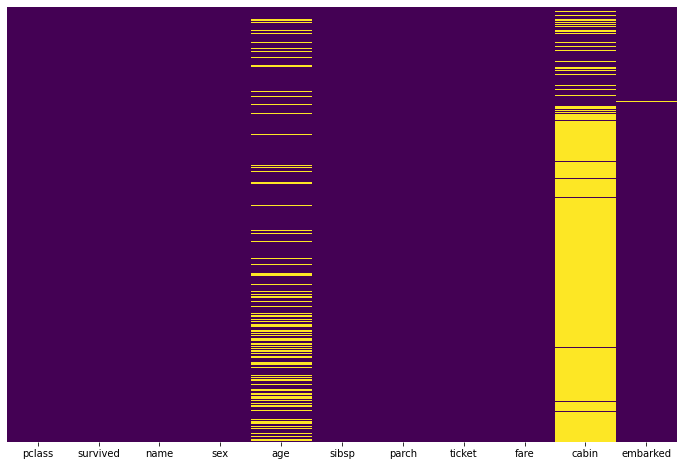

In [87]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

*The 'cabin' attribute has a lot of missing values so we will drop this column. The 'age' attribute is more manageable so we will impute and as far as the couple missing values of the 'embarked', we will just drop them also.*

In [88]:
df.drop('cabin', axis = 1, inplace=True)

### Age imputation

/home/michael/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='age'>

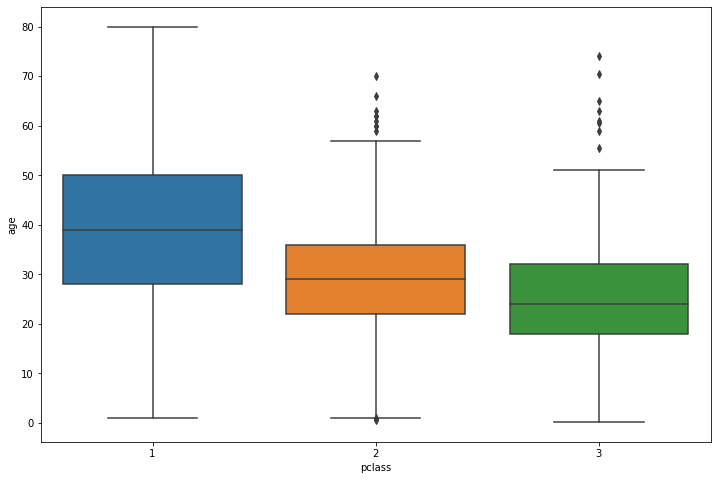

In [89]:
plt.figure(figsize=(12,8))
sns.boxplot('pclass','age',data = df)

*From the boxplot above we can clearly see the correlation between age and passenger class, so we will impute the missing values of age according with their passenger class. In order to do that we will create a function that imputes the missing age of a person with the average age of the passenger class it belongs to.*

In [90]:
def age_imputation(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass ==1:
            return df[df['pclass']==1]['age'].mean()
        if pclass ==2:
            return df[df['pclass']==2]['age'].mean()
        else:
            return df[df['pclass']==3]['age'].mean()
    else:
        return age    

*Apply the function to the data.*

In [92]:
df['age'] = df[['age','pclass']].apply(age_imputation, axis =1)

In [94]:
#remove the couple missing values of 'embarked'
df.dropna(inplace=True)

*Now if we produce the same heatmap again, we will see that we haven't any missing values.*

<AxesSubplot:>

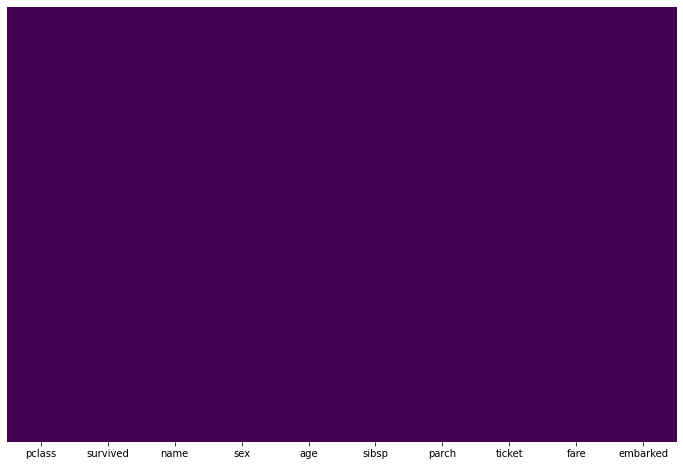

In [95]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

### Feature engineering

*As we deduced from the exploratory data analysis, the sex will be a very useful feature for our machine learning algorithm, but we also inspect that whether a passenger is a child or not plays an important role in its survivla, so it will be better if we identify the childern and have them be represented on the 'sex' column*

In [96]:
#Create a function to get the children
def get_child(person):
    age, sex = person
    if age < 14:
        return 'child'
    else:
        return sex

In [97]:
#Aplly the function and create a new 'Passenger' column
df['passenger'] = df[['age','sex']].apply(get_child, axis =1)

In [98]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,passenger
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,female
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,child
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,male
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,female


*We can see that a new 'passenger' column is created with male, female and child. There's no need to use the sex column, so we will drop it.*

In [99]:
df.drop('sex', axis =1, inplace=True)

In [100]:
df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,embarked,passenger
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,S,female
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,S,child
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,S,child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,S,male
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,S,female


*We will also drop the 'name' and 'ticket' columns since they wont contribute anything to our model.*

In [101]:
df.drop(['name','ticket'], axis =1, inplace=True)

In [102]:
df.head()

,pclass,survived,age,sibsp,parch,fare,embarked,passenger
0,1,1,29.0000,0,0,211.3375,S,female
1,1,1,0.9167,1,2,151.5500,S,child
2,1,0,2.0000,1,2,151.5500,S,child
3,1,0,30.0000,1,2,151.5500,S,male
4,1,0,25.0000,1,2,151.5500,S,female


### Encoding categorical values

*The last preprocess step that we will do is to convert categorical features, the 'passenger' and 'embarked' attributes, into dummy variables in order for our machine learning algorithm to accept them as inputs. One important thing to note here is that the 'pclass' attribute may have numerical values, but it is actually a categorical attribute since it only takes values from 1 to 3, which are the categories of the passenger class.*

In [108]:
categorical_feats = ['embarked','passenger','pclass']

In [109]:
final_df = pd.get_dummies(df, columns=categorical_feats,drop_first = True)

In [110]:
final_df.head()

,survived,age,sibsp,parch,fare,embarked_Q,embarked_S,passenger_female,passenger_male,pclass_2,pclass_3
0,1,29.0000,0,0,211.3375,0,1,1,0,0,0
1,1,0.9167,1,2,151.5500,0,1,0,0,0,0
2,0,2.0000,1,2,151.5500,0,1,0,0,0,0
3,0,30.0000,1,2,151.5500,0,1,0,1,0,0
4,0,25.0000,1,2,151.5500,0,1,1,0,0,0


*Now our dataframe is clean and ready for modelling.*

### Modelling with Logistic Regression

*Create our features and split the dataset into train and test datasets.*

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [115]:
X = final_df.drop('survived',axis =1)
y = final_df['survived']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

*Instantiate the model, fit it and make predictions.*

In [127]:
lrmodel = LogisticRegression(solver = 'liblinear')
lrmodel.fit(X_train, y_train)
predictions = lrmodel.predict(X_test)

*Validate our model.*

In [128]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [129]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       239
           1       0.77      0.70      0.73       153

    accuracy                           0.80       392
   macro avg       0.79      0.78      0.79       392
weighted avg       0.80      0.80      0.80       392



In [130]:
print(confusion_matrix(y_test, predictions))

[[207  32]
 [ 46 107]]
